In [1]:
from MHP import MHP
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
DATA_DIR = '.\data\enhanced'
hairdryer = 'hair_dryer_finished.csv'
microwave = 'microwave_finished.csv'
pacifier = 'pacifier_finished.csv'

In [3]:
pdata = pd.read_csv(os.path.join(DATA_DIR, pacifier))
hdata = pd.read_csv(os.path.join(DATA_DIR, hairdryer))
mdata = pd.read_csv(os.path.join(DATA_DIR, microwave))

pdata = pdata.dropna(axis=0,how='any').drop(pdata.tail(1).index)
pdata.review_date = pd.to_datetime(pdata.review_date, format='%m/%d/%Y')
hdata = hdata.dropna(axis=0,how='any')
hdata.review_date = pd.to_datetime(hdata.review_date, format='%m/%d/%Y')
mdata = mdata.dropna(axis=0,how='any')
mdata.review_date = pd.to_datetime(mdata.review_date, format='%m/%d/%Y')

In [4]:
pdata.sort_values('review_date', inplace=True)
hdata.sort_values('review_date', inplace=True)
mdata.sort_values('review_date', inplace=True)

In [25]:
def HP(dataset, name):
    #         high_rating   low_rating
    # useful       1             2
    # useless      3             4
    
    product = dataset.product_title.value_counts().index[0]
    subset = dataset[dataset.product_title==product]
    subset['relative'] = [(x - subset.iloc[0]['review_date']).days for x in subset['review_date']]
    data = subset[['relative', 'star_rating', 'tech']]
    data = data[data['star_rating'].astype(int)!=3]
    data['type'] = (data['star_rating']<3)+(data['tech']==0)*2
    data = np.array(data[['relative', 'type']])
    
    ahat = np.random.uniform(0,1, size=(4,4))
    mhat = np.random.uniform(0,1, size=4)
    w = 0.1

    P = MHP()
    P.data = data
    alpha, mu, ll = P.EM(ahat, mhat, w, epsilon=0.001, verbose=False)
    print(ll)
    
    Q = MHP(alpha, mu, w)
    Q.data = data
    Q.plot_rates()
    print(alpha, mu, w, sep='\n')
    print(name, product)
    

D:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Max eigenvalue: 0.50000
-2.4775164872727165
Max eigenvalue: 0.84528
[[6.09702377e-01 1.75374247e-01 3.94634631e-01 9.77975113e-01]
 [7.86300625e-02 5.21295570e-02 3.45601260e-02 6.37716049e-01]
 [4.08045104e-02 5.74315373e-02 6.26598503e-01 1.03626974e+00]
 [3.00589846e-09 1.54099600e-02 4.27239258e-02 3.57143381e-01]] [6.37482145e-02 1.06574334e-02 2.18293809e-08 7.66940749e-23] 0.1
hair remington ac2015 t|studio salon collection pearl ceramic hair dryer, deep purple


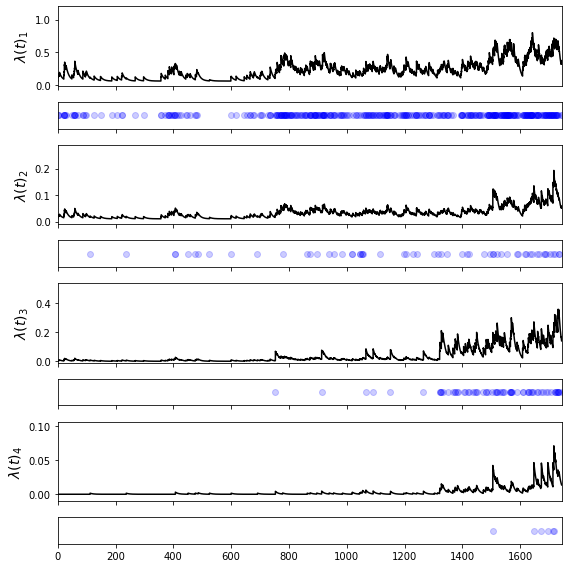

In [32]:
HP(hdata, 'hair')